[[0.23201741]
 [0.20727443]
 [0.09630353]
 [0.02910391]
 [0.        ]
 [0.03745865]
 [0.09859805]
 [0.10707831]
 [0.07112325]
 [0.0135012 ]
 [0.03624525]
 [0.18085375]
 [0.24282188]
 [0.17103322]
 [0.09322483]
 [0.02318541]
 [0.00672968]
 [0.06188984]
 [0.14105065]
 [0.12372165]
 [0.07673671]
 [0.02992454]
 [0.05434764]
 [0.17303755]
 [0.24969868]
 [0.19904116]
 [0.13895184]
 [0.06537346]
 [0.04802692]
 [0.11576103]
 [0.18294446]
 [0.1991073 ]
 [0.11877494]
 [0.06834688]
 [0.09649384]
 [0.20600164]
 [0.33142529]
 [0.28137649]
 [0.20215631]
 [0.10694199]
 [0.08221656]
 [0.15919352]
 [0.23844745]
 [0.27602217]
 [0.16466661]
 [0.10754666]
 [0.13217357]
 [0.25034519]
 [0.30508559]
 [0.28839501]
 [0.24345084]
 [0.13217762]
 [0.11302651]
 [0.17758339]
 [0.25259921]
 [0.26629478]
 [0.18882787]
 [0.14250834]
 [0.18566009]
 [0.38979507]
 [0.39202075]
 [0.29501402]
 [0.24134664]
 [0.16146644]
 [0.14181054]
 [0.21798307]
 [0.28747451]
 [0.29410431]
 [0.23951912]
 [0.16360439]
 [0.17885617]
 [0.30

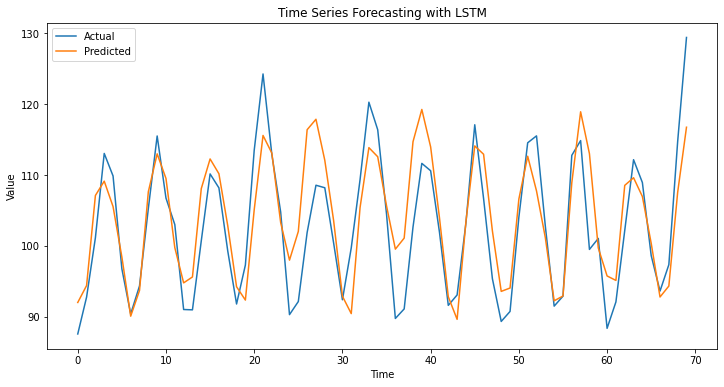

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load your time series data (assuming it's a single column of values)
# Replace this with your actual data source
data = pd.read_csv('Electric_Production.csv')
time_series = data['value'].values.reshape(-1, 1)

# Normalize the data to the range [0, 1]
scaler = MinMaxScaler()
time_series_normalized = scaler.fit_transform(time_series)
print(time_series_normalized)

# Split the data into training and test sets
train_size = int(len(time_series_normalized) * 0.8)
train_data = time_series_normalized[:train_size]
test_data = time_series_normalized[train_size:]

# Create sequences for training data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Adjust as needed
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and the actual values to their original scale
y_pred_original_scale = scaler.inverse_transform(y_pred)
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate RMSE (Root Mean Squared Error) as a performance metric
rmse = sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))
print(f"Root Mean Squared Error: {rmse}")

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_original_scale, label='Actual')
plt.plot(y_pred_original_scale, label='Predicted')
plt.legend()
plt.title('Time Series Forecasting with LSTM')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()